In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns

In [2]:
df = pd.read_csv("df_clean.csv")
df.head()

,Unnamed: 0,Region,State,Area,City,Consumer_profile,Product_category,Product_type,AC_1001_Issue,AC_1002_Issue,...,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Purchased_from,Call_details,Purpose,Fraud
0,0,South,Karnataka,Urban,Bangalore,Business,Entertainment,TV,0,0,...,1,2,0,15000.0,10,60,Manufacturer,0.5,Complaint,1
1,1,South,Karnataka,Rural,Bangalore,Business,Household,AC,1,1,...,0,0,0,20000.0,12,10,Dealer,1.0,Complaint,0
2,2,North,Haryana,Urban,Chandigarh,Personal,Household,AC,0,1,...,0,0,0,18000.0,14,10,Dealer,1.4,Claim,0
3,3,South,Tamil Nadu,Urban,Chennai,Business,Entertainment,TV,0,0,...,1,1,0,12000.0,16,20,Manufacturer,2.0,Complaint,0
4,4,North East,Jharkhand,Rural,Ranchi,Personal,Entertainment,TV,0,0,...,0,1,2,25000.0,15,6,Dealer,1.3,Claim,0


DATA PREPROCESSING PART 1

In [3]:
df.shape

(358, 21)

In [8]:
#dropping the unnamed column from the dataset
df.drop(['Unnamed: 0'],axis=1, inplace=True)

In [10]:
#checking for null and missing values
df.isnull().sum()

Region              0
State               0
Area                0
City                0
Consumer_profile    0
Product_category    0
Product_type        0
AC_1001_Issue       0
AC_1002_Issue       0
AC_1003_Issue       0
TV_2001_Issue       0
TV_2002_Issue       0
TV_2003_Issue       0
Claim_Value         0
Service_Centre      0
Product_Age         0
Purchased_from      0
Call_details        0
Purpose             0
Fraud               0
dtype: int64

In [12]:
#checking for duplicated values
df.duplicated().sum()

0

In [13]:
df.nunique()

Region                8
State                20
Area                  2
City                 27
Consumer_profile      2
Product_category      2
Product_type          2
AC_1001_Issue         3
AC_1002_Issue         3
AC_1003_Issue         3
TV_2001_Issue         3
TV_2002_Issue         3
TV_2003_Issue         3
Claim_Value         107
Service_Centre        7
Product_Age         188
Purchased_from        3
Call_details         37
Purpose               3
Fraud                 2
dtype: int64

In [14]:
#renaming the values in product issue column
df['AC_1001_Issue'] = df['AC_1001_Issue'].map({ 0 : 'No Issue', 1 : 'repair', 2 : 'replacement'})
df['AC_1002_Issue'] = df['AC_1002_Issue'].map({ 0 : 'No Issue', 1 : 'repair', 2 : 'replacement'})
df['AC_1003_Issue'] = df['AC_1003_Issue'].map({ 0 : 'No Issue', 1 : 'repair', 2 : 'replacement'})
df['TV_2001_Issue'] = df['TV_2001_Issue'].map({ 0 : 'No Issue', 1 : 'repair', 2 : 'replacement'})
df['TV_2002_Issue'] = df['TV_2002_Issue'].map({ 0 : 'No Issue', 1 : 'repair', 2 : 'replacement'})
df['TV_2003_Issue'] = df['TV_2003_Issue'].map({ 0 : 'No Issue', 1 : 'repair', 2 : 'replacement'})

In [16]:
df.describe()

,Claim_Value,Service_Centre,Product_Age,Call_details,Fraud
count,358.000000,358.000000,358.000000,358.000000,358.000000
mean,11994.534916,12.812849,201.843575,11.931844,0.097765
std,12063.213579,1.766844,259.731564,11.559474,0.297413
min,0.000000,10.000000,3.000000,0.500000,0.000000
25%,4006.000000,12.000000,14.000000,1.600000,0.000000
50%,7194.000000,13.000000,60.000000,6.500000,0.000000
75%,15000.000000,15.000000,303.750000,23.000000,0.000000
max,50000.000000,16.000000,991.000000,30.000000,1.000000


[Text(0.5, 1.0, 'Areawise Distribution of Fraudulent Claims')]

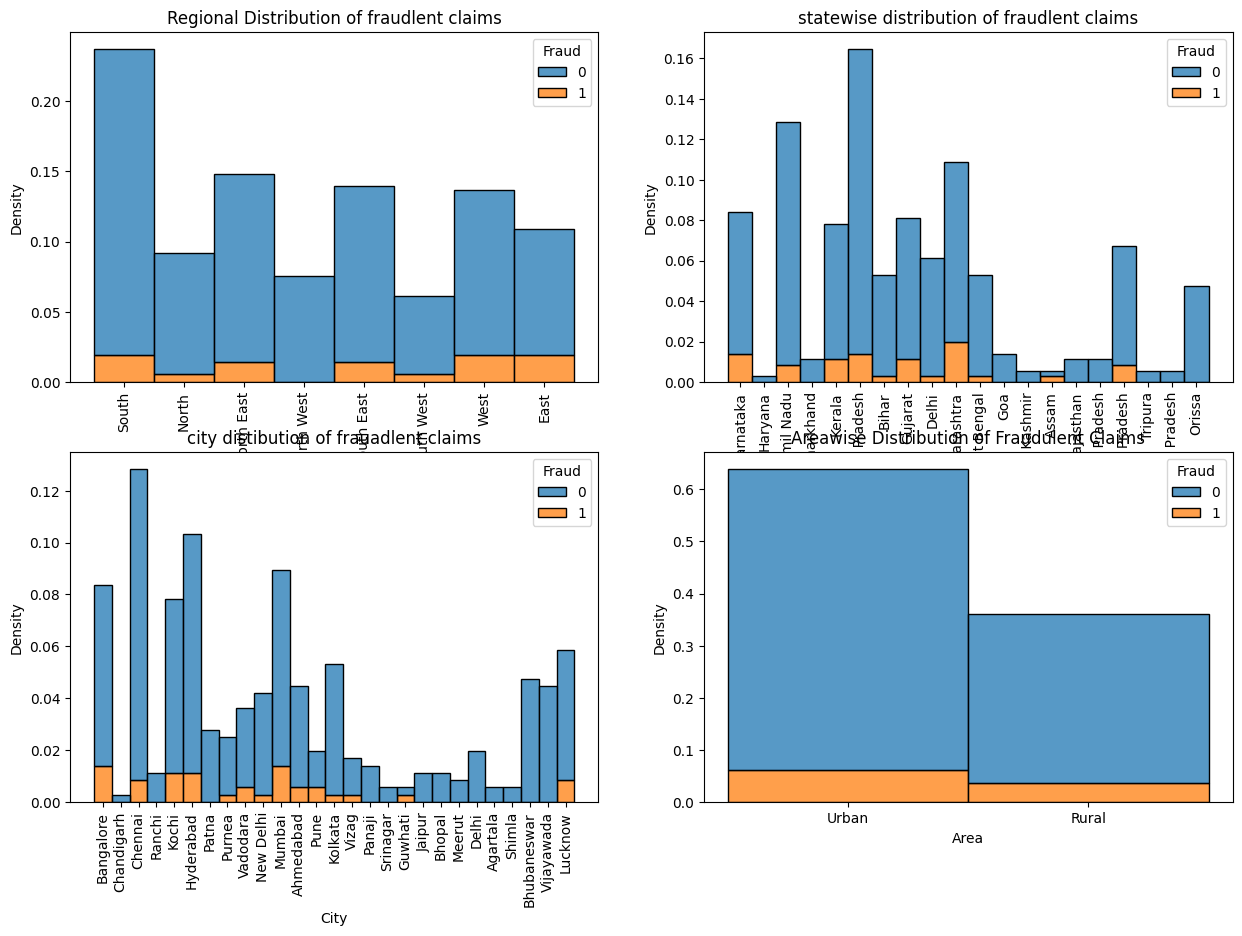

In [27]:
fig, ax = plt.subplots(2,2,figsize=(15,10))

sns.histplot(x = 'Region',data =df,ax =ax[0,0],hue ='Fraud',element = 'bars',fill =True, stat='density',multiple='stack').set(title='Regional Distribution of fraudlent claims'),ax[0,0].xaxis.set_tick_params(rotation=90)
sns.histplot(x ='State',data=df,ax =ax[0,1],hue = 'Fraud',element='bars',fill=True,stat='density',multiple='stack').set(title='statewise distribution of fraudlent claims'),ax[0,1].xaxis.set_tick_params(rotation=90)
sns.histplot(x = 'City',data=df,ax=ax[1,0],hue = 'Fraud',element='bars',fill=True,stat='density',multiple='stack').set(title='city distibution of frauadlent claims'),ax[1,0].xaxis.set_tick_params(rotation=90)
sns.histplot(x = 'Area', data = df, ax =ax[1,1], hue = 'Fraud', element='bars', fill=True, stat='density',multiple='stack').set(title='Areawise Distribution of Fraudulent Claims')
